In [1]:
import os
import sys

src_path = os.path.abspath(os.path.join('../../', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)

from tools.data_processor import DataProcessor
from tools.frame_processors import SupervisionVertexProcessorWithLandmarkFrontalization
from tools.frame_preprocessors import TextureFrontalizationPreprocessor, FaceExtractionPreprocessor

In [2]:
FAULTY_DATA_PATH = os.path.abspath(os.path.join('..', '..', 'data', 'raw', 'miami_deception', 'Videos', 'BF001_1PT.wmv'))

REFERENCE_POINTS_PATH = os.path.abspath(os.path.join('..', '..', 'data', 'reference_points', 'key_points_xyz.npy'))

MODELS_PATH = os.path.join(src_path, 'models', 'frontalization_models')

In [ ]:
dp = DataProcessor(
    frame_preprocessors=[
        FaceExtractionPreprocessor(
            skip_bad_frames=False,
            output_size=(200, 200)
        ),
        TextureFrontalizationPreprocessor(
            models_path=MODELS_PATH,
            do_calculate_symmetry=True
        ),
    ],
    frame_processor=SupervisionVertexProcessorWithLandmarkFrontalization(
        reference_points_path=REFERENCE_POINTS_PATH,
        do_make_face_mesh=True  # Output pure landmarks
    ),
)

 15%|█▍        | 163/1111 [00:10<00:57, 16.41it/s]

: 

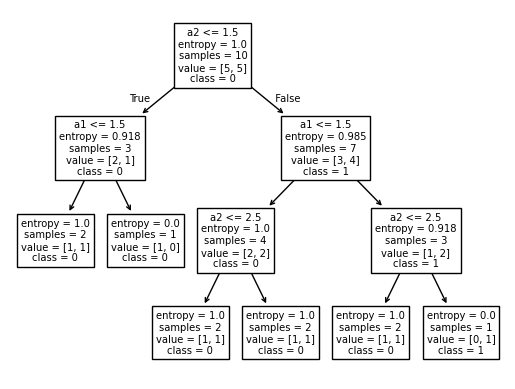

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
x = pd.DataFrame({
    "a1": ["1", "1", "1", "2", "2", "1", "1", "1", "2", "2"],
    "a2": ["1", "2", "3", "1", "2", "1", "2", "3", "2", "3"]
})
y = [0]*5 + [1]*5
clf = tree.DecisionTreeClassifier(criterion = "entropy",
splitter = "best",
min_samples_split = 3)
clf.fit(x,y)
fig = plt.figure()
_ = tree.plot_tree(clf,
feature_names=["a1", "a2"],
class_names=["0", "1"])
plt.show()